# usALEX-5samples - HDF5 conversion
> *This notebook converts the us-ALEX `.sm` data file into [Photon-HDF5](http://photon-hdf5.readthedocs.org/) file format.*

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [2]:
import phconvert as phc
phc.__version__

'0.7.1'

# Data files

Paste here the folder containing the `.sm` files to convert:

In [3]:
data_dir = r'C:\Data\Antonio\data/8-spot 5samples data/2012-11-26/'

This is the list of the files that will be converted:

In [4]:
file_list = glob(data_dir + '*.sm')
file_list

['C:\\Data\\Antonio\\data/8-spot 5samples data/2012-11-26\\004_dsDNA_17d_green100u_red40u.sm',
 'C:\\Data\\Antonio\\data/8-spot 5samples data/2012-11-26\\005_dsDNA_27d_green100u_red40u.sm',
 'C:\\Data\\Antonio\\data/8-spot 5samples data/2012-11-26\\006_dsDNA_7d_green100u_red40u.sm',
 'C:\\Data\\Antonio\\data/8-spot 5samples data/2012-11-26\\007_dsDNA_12d_3nM_green100u_red40u.sm',
 'C:\\Data\\Antonio\\data/8-spot 5samples data/2012-11-26\\008_dsDNA_22d_500pM_green100u_red40u.sm']

# Author

In [5]:
author = 'Francesco Panzeri/Antonino Ingargiola'
author_affiliation = 'UCLA'
creator = 'Antonino Ingargiola'
creator_affiliation = 'UCLA'

# Sample

In [6]:
description = 'dsDNA with D-A separation of %d base-pairs. %s.'
sample_name = 'Doubly-labeled 40-bp dsDNA, D-A separation %d base-pairs.'
dye_names = 'ATTO550, ATTO647N'
buffer_name = 'TE50'

# Test one file

In [7]:
import re

In [8]:
bp_pattern = '.+_([0-9]{1,2})d_.+'

In [9]:
filename = file_list[0]
spad_name = 'MPD SPAD (donor), MPD RE-SPAD (acceptor)'
sample_bp = int(re.match(bp_pattern, filename).group(1))
spad_name, sample_bp

('MPD SPAD (donor), MPD RE-SPAD (acceptor)', 17)

In [10]:
d = phc.loader.usalex_sm(filename,
                         donor = 0,
                         acceptor = 1,
                         alex_period = 4000,
                         alex_offset = 700,
                         alex_period_donor = (2150, 3900),
                         alex_period_acceptor = (200, 1900),
                         excitation_wavelengths = (532e-9, 635e-9),
                         detection_wavelengths = (580e-9, 680e-9))

 - Loading 'C:\Data\Antonio\data/8-spot 5samples data/2012-11-26\004_dsDNA_17d_green100u_red40u.sm' ... 
 [DONE]



In [11]:
ph_data = d['photon_data']
det = ph_data['detectors']
timestamps = ph_data['timestamps']

In [12]:
np.unique(det)

array([0, 1], dtype=uint32)

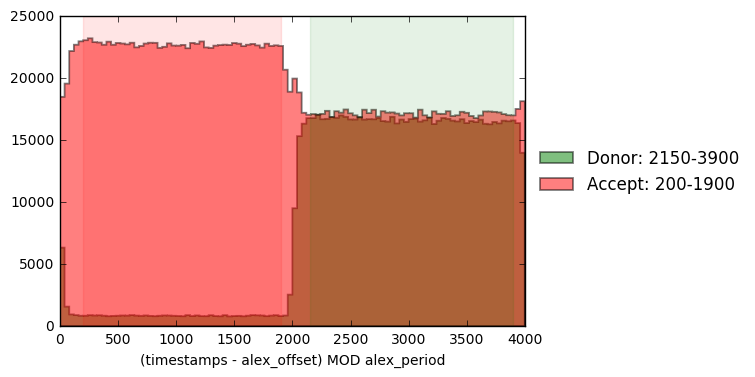

In [13]:
phc.plotter.alternation_hist(d)

## Add author and sample info

In [14]:
d['description'] = description % (sample_bp, spad_name)

d['sample'] = dict(
    sample_name=sample_name % sample_bp,
    dye_names=dye_names,
    buffer_name=buffer_name,
    num_dyes = len(dye_names.split(',')))

d['identity'] = dict(
    author=author,
    author_affiliation=author_affiliation,
    creator=creator,
    creator_affiliation=creator_affiliation)

In [15]:
d['description']

'dsDNA with D-A separation of 17 base-pairs. MPD SPAD (donor), MPD RE-SPAD (acceptor).'

## Validation

In [16]:
#phc.hdf5.save_photon_hdf5(d)

# Convert all the files

In [17]:
for filename in file_list:

    spad_name = 'MPD SPAD (donor), MPD RE-SPAD (acceptor)'
    sample_bp = int(re.match(bp_pattern, filename).group(1))
    print(spad_name, sample_bp, '\t', filename)

    d = phc.loader.usalex_sm(filename,
                         donor = 0,
                         acceptor = 1,
                         alex_period = 4000,
                         alex_offset = 700,
                         alex_period_donor = (2150, 3900),
                         alex_period_acceptor = (200, 1900),
                         excitation_wavelengths = (532e-9, 635e-9),
                         detection_wavelengths = (580e-9, 680e-9))

    
    d['description'] = description % (sample_bp, spad_name)

    d['sample'] = dict(
        sample_name=sample_name % sample_bp,
        dye_names=dye_names,
        buffer_name=buffer_name,
        num_dyes = len(dye_names.split(',')))


    d['identity'] = dict(
        author=author,
        author_affiliation=author_affiliation,
        creator=creator,
        creator_affiliation=creator_affiliation)
    
    phc.hdf5.save_photon_hdf5(d, overwrite=True)

MPD SPAD (donor), MPD RE-SPAD (acceptor) 17 	 C:\Data\Antonio\data/8-spot 5samples data/2012-11-26\004_dsDNA_17d_green100u_red40u.sm
 - Loading 'C:\Data\Antonio\data/8-spot 5samples data/2012-11-26\004_dsDNA_17d_green100u_red40u.sm' ... 
 [DONE]

Saving: C:\Data\Antonio\data/8-spot 5samples data/2012-11-26\004_dsDNA_17d_green100u_red40u.hdf5
MPD SPAD (donor), MPD RE-SPAD (acceptor) 27 	 C:\Data\Antonio\data/8-spot 5samples data/2012-11-26\005_dsDNA_27d_green100u_red40u.sm
 - Loading 'C:\Data\Antonio\data/8-spot 5samples data/2012-11-26\005_dsDNA_27d_green100u_red40u.sm' ... 
 [DONE]

Saving: C:\Data\Antonio\data/8-spot 5samples data/2012-11-26\005_dsDNA_27d_green100u_red40u.hdf5
MPD SPAD (donor), MPD RE-SPAD (acceptor) 7 	 C:\Data\Antonio\data/8-spot 5samples data/2012-11-26\006_dsDNA_7d_green100u_red40u.sm
 - Loading 'C:\Data\Antonio\data/8-spot 5samples data/2012-11-26\006_dsDNA_7d_green100u_red40u.sm' ... 
 [DONE]

Saving: C:\Data\Antonio\data/8-spot 5samples data/2012-11-26\006_dsD

## Load the converted files

In [18]:
from fretbursts import *

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.5.6).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


In [19]:
from IPython.display import display

C:\Data\Antonio\data/8-spot 5samples data/2012-11-26\004_dsDNA_17d_green100u_red40u.hdf5
# Total photons (after ALEX selection):   2,482,091
#  D  photons in D+A excitation periods:    764,963
#  A  photons in D+A excitation periods:  1,717,128
# D+A photons in  D  excitation period:   1,479,315
# D+A photons in  A  excitation period:   1,002,776

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


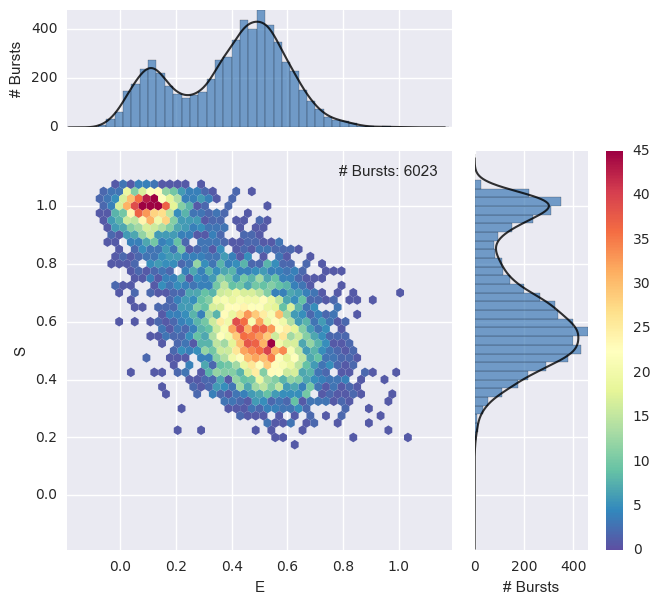

C:\Data\Antonio\data/8-spot 5samples data/2012-11-26\005_dsDNA_27d_green100u_red40u.hdf5
# Total photons (after ALEX selection):   2,560,261
#  D  photons in D+A excitation periods:  1,168,588
#  A  photons in D+A excitation periods:  1,391,673
# D+A photons in  D  excitation period:   1,722,217
# D+A photons in  A  excitation period:     838,044

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


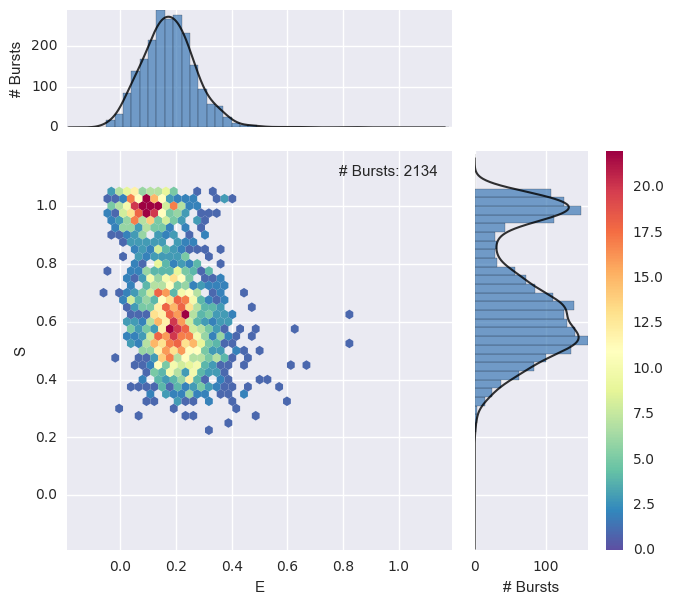

C:\Data\Antonio\data/8-spot 5samples data/2012-11-26\006_dsDNA_7d_green100u_red40u.hdf5
# Total photons (after ALEX selection):   1,930,947
#  D  photons in D+A excitation periods:    465,208
#  A  photons in D+A excitation periods:  1,465,739
# D+A photons in  D  excitation period:   1,197,542
# D+A photons in  A  excitation period:     733,405

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


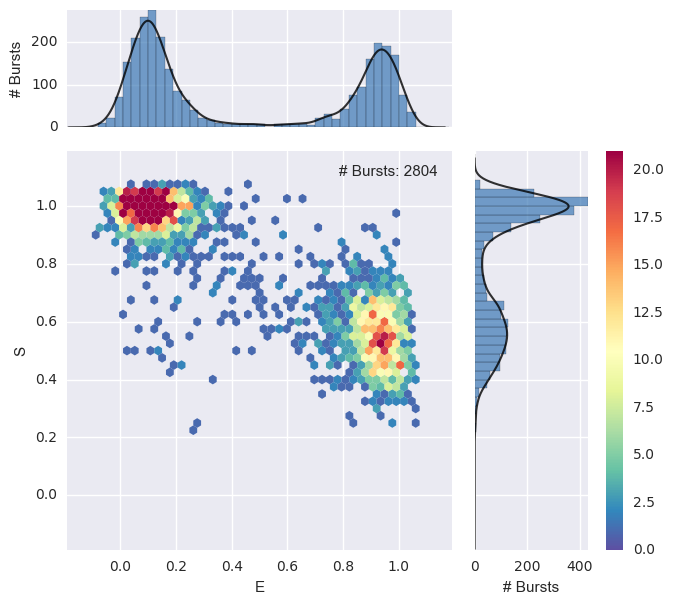

C:\Data\Antonio\data/8-spot 5samples data/2012-11-26\007_dsDNA_12d_3nM_green100u_red40u.hdf5
# Total photons (after ALEX selection):   1,662,103
#  D  photons in D+A excitation periods:    408,947
#  A  photons in D+A excitation periods:  1,253,156
# D+A photons in  D  excitation period:   1,055,878
# D+A photons in  A  excitation period:     606,225

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


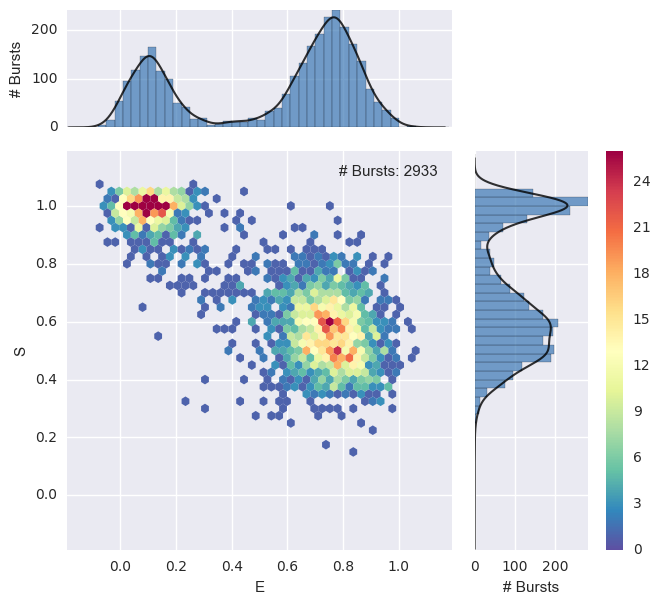

C:\Data\Antonio\data/8-spot 5samples data/2012-11-26\008_dsDNA_22d_500pM_green100u_red40u.hdf5
# Total photons (after ALEX selection):   2,127,940
#  D  photons in D+A excitation periods:    699,249
#  A  photons in D+A excitation periods:  1,428,691
# D+A photons in  D  excitation period:   1,251,249
# D+A photons in  A  excitation period:     876,691

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


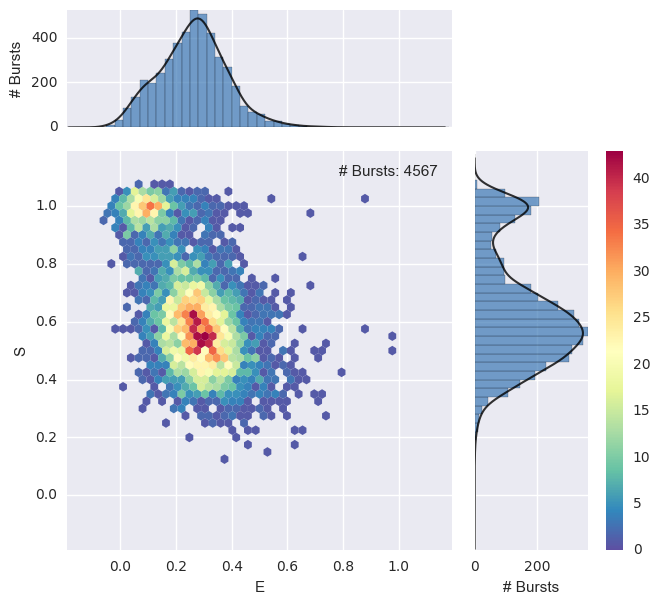

In [20]:
for fname in file_list:
    fname = fname[:-2] + 'hdf5'
    print(fname)
    
    d = loader.photon_hdf5(fname)
    loader.alex_apply_period(d)
    
    d.calc_bg(fun=bg.exp_fit)
    d.burst_search()
    ds = d.select_bursts(select_bursts.size, th1=20)
    alex_jointplot(ds)
    fig = plt.gcf()
    plt.close(fig)
    display(fig)